In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from ipywidgets import interact, IntSlider

import warnings
warnings.filterwarnings("ignore")



In [30]:
# Dataset real (StudentsPerformance)
kaggle_url = "https://raw.githubusercontent.com/BenjaminDillon2003/early-academic-risk-prediction/e4b3182e231541a767f7af61080c28fb50ac75bf/synthetic_dataset.csv"
kaggle_data = pd.read_csv(kaggle_url)

# Dataset sintético
synthetic_url = "https://raw.githubusercontent.com/BenjaminDillon2003/early-academic-risk-prediction/e4b3182e231541a767f7af61080c28fb50ac75bf/synthetic_dataset.csv"
synthetic = pd.read_csv(synthetic_url)

kaggle_data.head(), synthetic.head()



(   gender race/ethnicity parental level of education         lunch  \
 0  female        group B           bachelor's degree      standard   
 1  female        group C                some college      standard   
 2  female        group B             master's degree      standard   
 3    male        group A          associate's degree  free/reduced   
 4    male        group C                some college      standard   
 
   test preparation course  math score  reading score  writing score  
 0                    none          72             72             74  
 1               completed          69             90             88  
 2                    none          90             95             93  
 3                    none          47             57             44  
 4                    none          76             78             75  ,
    gender race/ethnicity parental level of education         lunch  \
 0  female        group B           bachelor's degree      standard   
 1 

In [31]:
synthetic = synthetic.rename(columns={
    "math score": "math_score",
    "reading score": "reading_score",
    "writing score": "writing_score",
    "test preparation course": "test_prep"
})


In [32]:
synthetic.columns


Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test_prep', 'math_score', 'reading_score', 'writing_score'],
      dtype='object')

In [33]:
synthetic["avg_score"] = (
    synthetic["math_score"] +
    synthetic["reading_score"] +
    synthetic["writing_score"]
) / 3


In [34]:
def assign_risk(row):
    risk = 0

    # Academic risk
    if row['avg_score'] < 60:
        risk += 2
    elif row['avg_score'] < 75:
        risk += 1

    # Lunch socioeconomic proxy
    if row["lunch"] == "free/reduced":
        risk += 1

    # Test prep helps reduce risk
    if row["test_prep"] == "completed":
        risk -= 1

    if risk >= 2:
        return "High"
    elif risk == 1:
        return "Medium"
    else:
        return "Low"

synthetic["risk_level"] = synthetic.apply(assign_risk, axis=1)


In [35]:
X = synthetic[["math_score","reading_score","writing_score"]]
y = synthetic["risk_level"].map({"Low":0, "Medium":1, "High":2})

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)


In [36]:
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.74
              precision    recall  f1-score   support

           0       0.76      0.76      0.76        89
           1       0.57      0.57      0.57        72
           2       0.85      0.85      0.85        89

    accuracy                           0.74       250
   macro avg       0.73      0.73      0.73       250
weighted avg       0.74      0.74      0.74       250



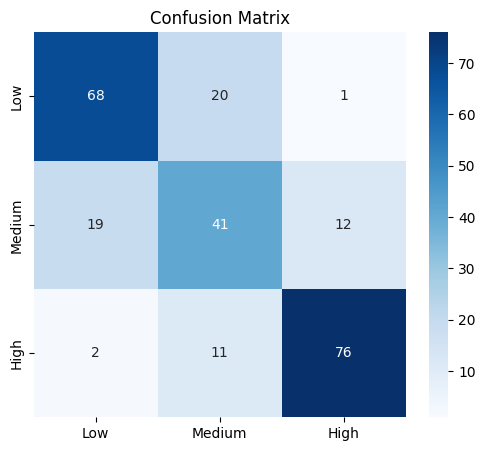

In [37]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, cmap="Blues",
            xticklabels=["Low","Medium","High"],
            yticklabels=["Low","Medium","High"])
plt.title("Confusion Matrix")
plt.show()


In [38]:
def predict_risk(math_score, reading_score, writing_score):

    X_new = pd.DataFrame([{
        "math_score": math_score,
        "reading_score": reading_score,
        "writing_score": writing_score
    }])

    pred = model.predict(X_new)[0]

    if pred == 0:
        print("Low Risk")
    elif pred == 1:
        print("Medium Risk")
    else:
        print("High Risk")

interact(
    predict_risk,
    math_score=IntSlider(min=0,max=100,value=70),
    reading_score=IntSlider(min=0,max=100,value=70),
    writing_score=IntSlider(min=0,max=100,value=70)
)


interactive(children=(IntSlider(value=70, description='math_score'), IntSlider(value=70, description='reading_…

<function __main__.predict_risk(math_score, reading_score, writing_score)>